Introduction:

There are many components that one must consider when purchasing a car. As different individuals vary different components of the car, some may have very distinct preferences compared to others. For example, if one's sole reason to buy a car is to move from point A to point B as cost efficient as possible, the main component they will be looking at is the mpg or miles per gallon and the amount of mileage the car has. However, if one is a car enthusiast, they may care more about the engine size and will tend to prefer manual transition cars so they have greater control of the car. Additionally, when purchasing a used car, there could be other components that influence the consumers when purchasing the product. There are significantly less options to choose from regarding the colors or the model, and the price range will be substantially lower, which may allow the consumers to go to a more luxurious model. 

First, we must place packages into our current invironment. Next, we will import the data so that we can conduct our analysis. 

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/PokeBowen/FordProject/main/ford.csv"
df = pd.read_csv(url)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


We want to identify the specifics about the data, so we will have a better understanding with our data before drawing conclusions

In [4]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [19]:
df["year"].value_counts()

2017    4888
2018    4014
2019    3194
2016    2331
2015    1368
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
2060       1
Name: year, dtype: int64

We notice that the frequency based on the years increases as the time increases. This indicates a right skewness for the years. We also notice that there is one observation with the year 2060. We will have to cleanse this point since this was probably a mistake or typo when inputting the data. 

In [38]:
df = df[(df["year"] != 2060)]
max(df["year"])

2020

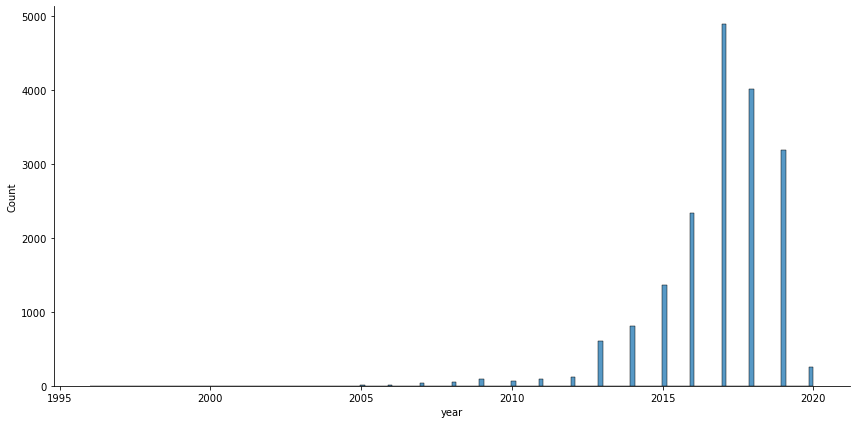

In [39]:
sns.displot(data = df, x = "year", height = 6, aspect = 12/6);

In [27]:
df["model"].value_counts()

 Fiesta                   6556
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

Notice that some models are prevalent from years ago, some are relatively new models, and some even were discontinued. For example, the Ford Fiesta with the greatest frequency out of all was introduced to the United States in 2011, but was discontinued in 2019. Additionally, some models that are included in this data are very old models that barely made the cutoff for this data. The Ford Escort is an example; this car began its production in 1968 and ended in 2003. 

In [33]:
df[["model", "engineSize"]].value_counts().head(30)

model            engineSize
 Fiesta          1.0           4266
 Focus           1.0           2178
 Kuga            2.0           1358
 Focus           1.5           1233
 Fiesta          1.2            917
 EcoSport        1.0            870
 Kuga            1.5            843
 Focus           2.0            755
 Fiesta          1.1            559
 Ka+             1.2            526
 Fiesta          1.5            425
 Mondeo          2.0            397
 Focus           1.6            331
 Fiesta          1.6            308
 EcoSport        1.5            265
 S-MAX           2.0            262
 C-MAX           1.5            252
 Galaxy          2.0            211
 Edge            2.0            208
 KA              1.2            183
 C-MAX           1.0            157
 B-MAX           1.0            144
 Grand C-MAX     1.5            134
 B-MAX           1.6            113
 Mondeo          1.5            103
 C-MAX           1.6             92
 Puma            1.0             77


In [56]:
df[["model", "engineSize"]].value_counts().tail(30)

model             engineSize
 Galaxy           1.6           5
 Focus            2.5           5
 Galaxy           1.8           5
                  1.5           5
 Mondeo           2.2           4
 Ka+              0.0           4
 S-MAX            2.2           4
 Fiesta           1.3           3
 Tourneo Custom   2.2           3
 Tourneo Connect  1.6           3
 Streetka         1.6           2
 S-MAX            1.8           2
                  2.3           1
 Transit Tourneo  2.2           1
 Escort           1.8           1
 Tourneo Connect  1.0           1
 Galaxy           2.3           1
 Ranger           3.2           1
 Puma             1.7           1
                  1.6           1
                  0.0           1
 Mondeo           5.0           1
                  2.3           1
 Galaxy           2.2           1
 Fiesta           2.0           1
 Mondeo           0.0           1
 Focus            1.4           1
 Kuga             0.0           1
 Ka+              1

Overall, the engine size seems to be fairly small for all of the cars in this dataset. In the next graph, we compare the engine size of the car to the production year to see if the car gets more powerful as years pass and society experiences technological advancements.

Text(0.5, 6.79999999999999, 'Year')

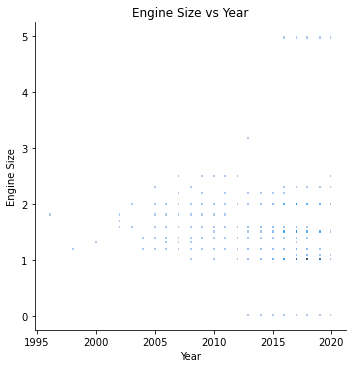

In [66]:
sns.displot(data = df, x = "year", y = "engineSize")
plt.title("Engine Size vs Year")
plt.ylabel("Engine Size")
plt.xlabel("Year")

As seen in the graph above, as years pass, the variability of the engine size increases. This may be an indication of the car production companies to satisfy the needs of various customers. For example, car enthusiasts may prefer loud and powerful cars with a big engine. However, those who wants a small compact car because they get car sick from the sudden acceleration may prefer a very weak car engine. 

Now, we will look at the transmissions of the car:

In [51]:
df["transmission"].value_counts()

Manual       15518
Automatic     1360
Semi-Auto     1087
Name: transmission, dtype: int64

This number can be counterintuitive since technological advancements have yielded the production of manual cars. Currently, only approximately 13 percent of the cars in the market is even offered a manual transmission. We would expect that the number of automatic and semi-automatic cars will follow the same way, but in this dataset, there is significantly more cars with manual transmission. We will assess if the production years of the car has any relationship to the type of transmission.

Text(0.5, 1.0, 'Transmission by Years')

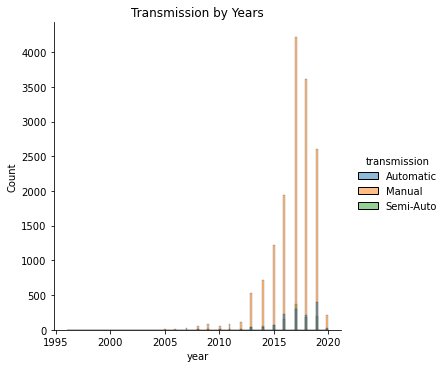

In [67]:
sns.displot(data = df, x = "year", hue = "transmission")
plt.title("Transmission by Years")

As we can see in the graph above, the amount of cars with manual transmission is not decreasing as time increases. Perhaps, the population that this sample was obtained may have been car enthusiasts or those who have a specific niche attraction to manual cars. 